# Raman
## Raman Peaks Mapping

**Raman Mapping `Mapping Raman Sample.wdf`**

Expt setting:

- Data collection time: 2025/2/11
- Sampling site: centre, edge of the growth zone
- Exposure time: 0.5s / data point
- Laser Power: 5%
- magnification: 50x， 100x
- Laser setting: central $\lambda$ = 950 cm^-1 ; laser = `532`nm ; grating: 1800 vis
- Step-size: 0.3um

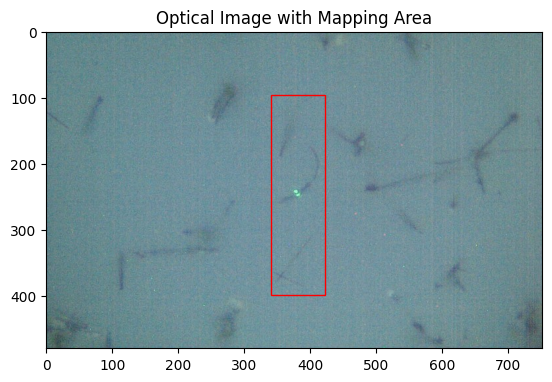

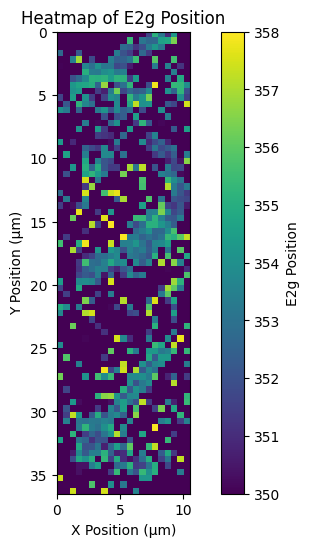

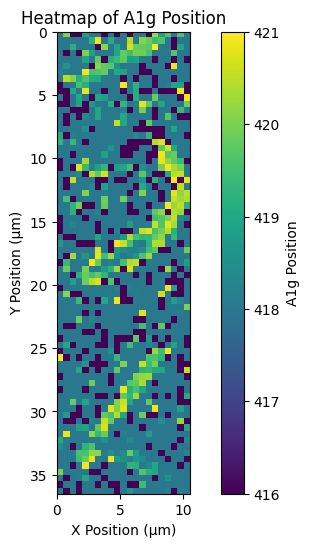

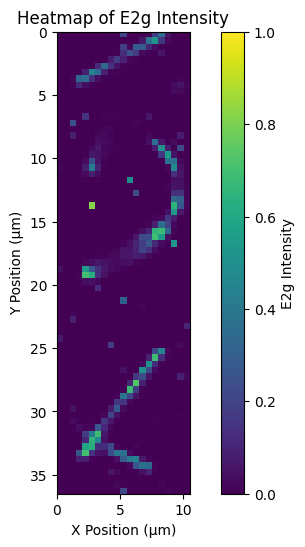

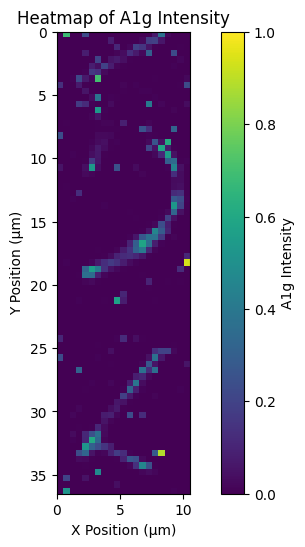

In [2]:
from Mapping import RamanMapping
# Define your custom_peaks and data_range
custom_peaks = {                            # Fitting-params are given as [wavenumber, scale, amplitude] form
    'E2g':([348, 0, 0], [360, 10, 10]),     # necessary for 2D materials
    'A1g': ([418,0,0], [424,10,10]),        # necessary for 2D materials
    'Si': ([518, 0, 0], [525, 20, 10]),     # necessary for Si substrate
    '2LA(M)': ([340, 0, 0], [350, 5, 5])    # optional
}
data_range = (0, 1012) # based on central wavelength 520cm-1, 532nm, 1800vis gratings, there are total 1013 data points  
step_size = 0.5  # Actual step-size of your mapping, unit: micro meters/um

# Initialise the modules
raman_map = RamanMapping('Mapping Raman Sample.wdf', 
                        custom_peaks, 
                        data_range,
                        normalize=True,            # Normalize spectra
                        background_remove=True,    # Enable background removal
                        poly_degree=2,
                        step_size=step_size,)

# Display optical image (optional)
raman_map.show_optical_image()

# Fit spectra
raman_map.fit_spectra()


# Position plot (requires peak_name)
raman_map.plot_heatmap(peak_name="E2g", data_type='position', filter_range=[350, 358])
raman_map.plot_heatmap(peak_name="A1g", data_type='position',filter_range=[416, 421])

# Position plot (requires peak_name)
raman_map.plot_heatmap(peak_name="E2g", data_type='intensity',filter_range=[0,1])
raman_map.plot_heatmap(peak_name="A1g", data_type='intensity',filter_range=[0,1])

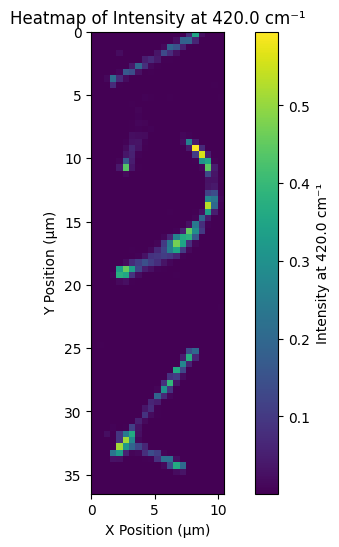

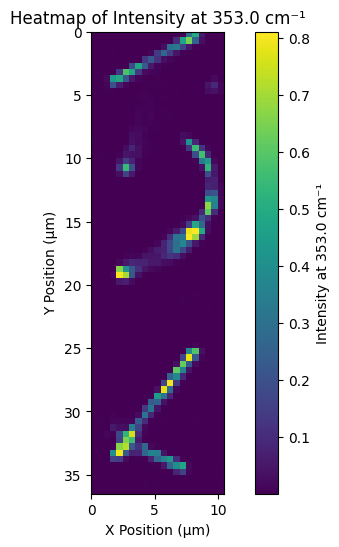

In [3]:
# Plot intensity at a specific wavenumber
raman_map.plot_heatmap(data_type='specific_intensity', 
                       specific_wavenumber=420.0    # in Float form, e.g. 418.0, 520.0
                       )
raman_map.plot_heatmap(data_type='specific_intensity', specific_wavenumber=353.0)

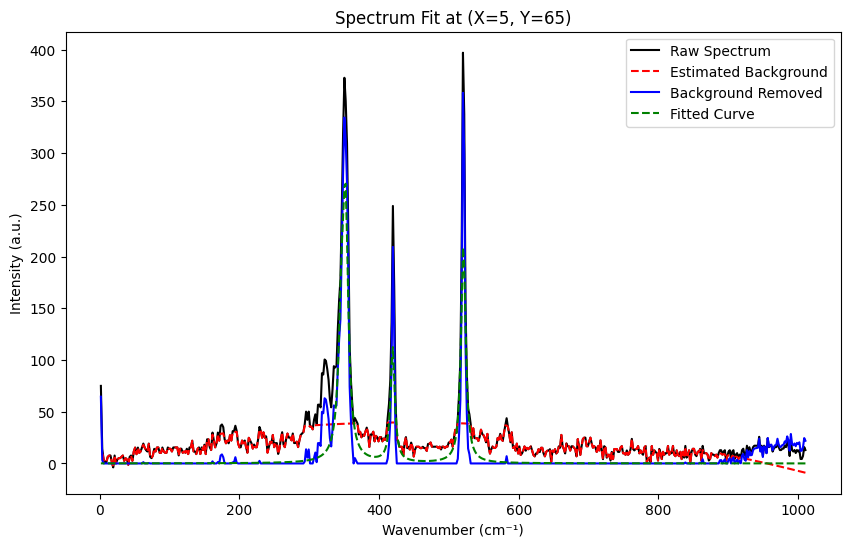

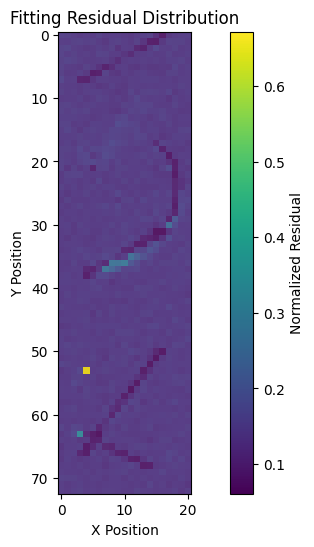

In [4]:
# To verify effectiveness of the fitting, we can plot spectrum fitting at a specific point
raman_map.plot_spectrum_fit(x=5, y=65) 

# Also you can check if residual is below threshold
raman_map.plot_residual_distribution(threshold=0.5 # Residual above shreshold will be marked red colour
                                     )

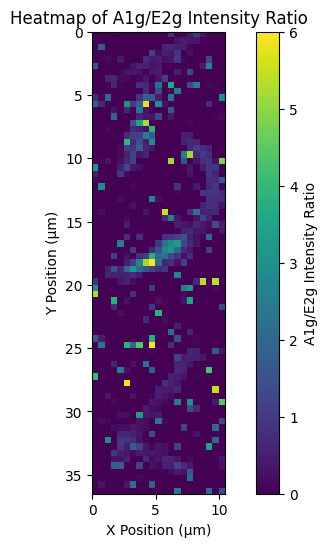

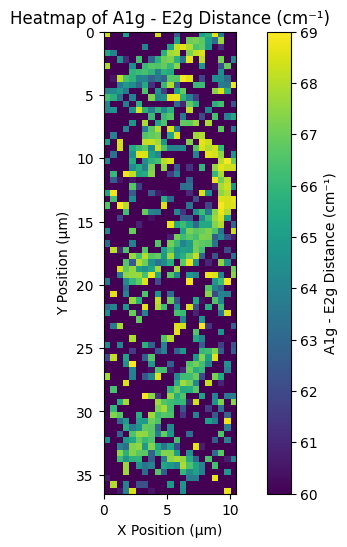

In [5]:
# Plot heatmap of A1g peak to E2g peak intensity ratio
raman_map.plot_ratio_heatmap(ratio_type='A1g/E2g', filter_range=[0, 6])

# Plot heatmap of A1g - E2g wavenumber difference
raman_map.plot_heatmap(data_type='distance',filter_range=[60,69])


## Raman Peak Area Integration

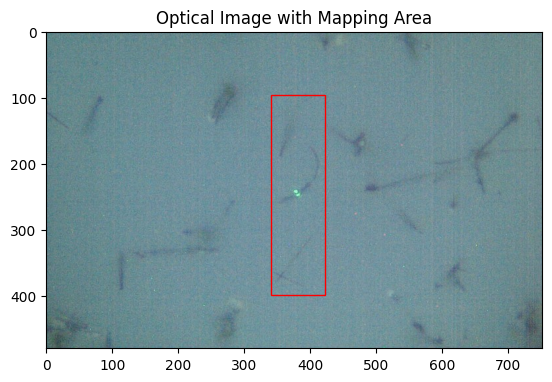

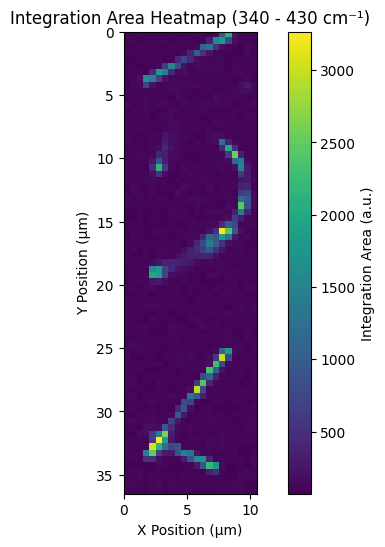

In [3]:
from Mapping import Raman_Integration

# Define integration parameters
integration_range = (340, 430)  # Range of intergrated spectrum range, unit cm-1
step_size = 0.5  # Check your actual step-size

# Initialise the class module
raman_integration = Raman_Integration('Mapping Raman Sample.wdf', 
                                      integration_range=integration_range, 
                                      step_size=step_size, 
                                      background_remove=True,
                                      poly_degree=2)

# Display optcial image (optional)
raman_integration.show_optical_image()

# Calculate integrated area
raman_integration.calculate_integration()

# Plot heatmap of integration
raman_integration.plot_integration_heatmap()

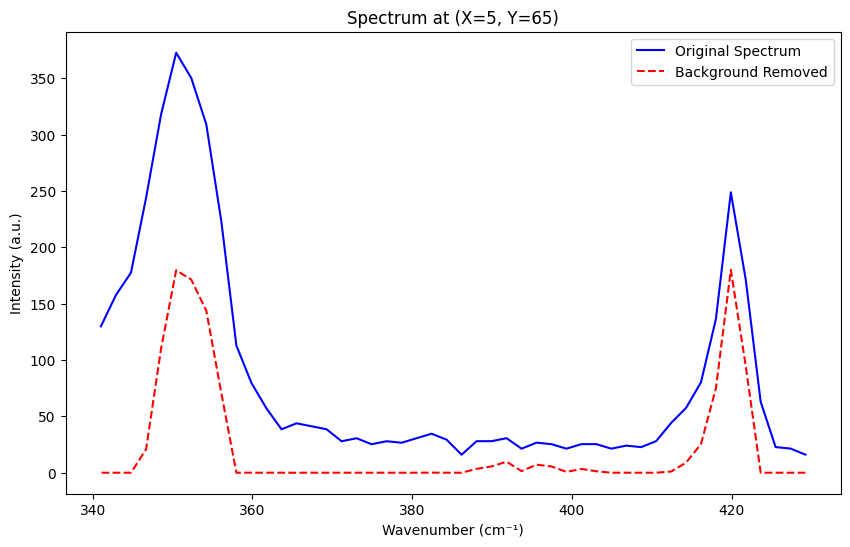

In [2]:
# Check spectrum background removal
raman_integration.plot_spectrum(x=5, y=65)